In [1]:
import render
import rooms.dataset
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.set_default_dtype(torch.float32)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device  = "cpu"

In [3]:
D_0 = rooms.dataset.dataLoader("classroomBase")

In [4]:
L_0 = render.get_listener(source_xyz=D_0.speaker_xyz, listener_xyz = D_0.xyzs[0], surfaces=D_0.all_surfaces, 
                                                speed_of_sound=D_0.speed_of_sound,
                                                parallel_surface_pairs=D_0.parallel_surface_pairs,
                                                max_order=D_0.max_order, max_axial_order=D_0.max_axial_order )

Considered Paths:	59049
Total Considered Paths, after Axial:	59079
Valid Paths:	851


In [5]:
R_0 = render.Renderer(n_surfaces=len(D_0.all_surfaces))

In [6]:
# Utilizza più GPU se disponibili
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    R_0 = nn.DataParallel(R_0).module

In [7]:
pt_file = torch.load('./models/classroomBase/weights.pt', map_location=device)
R_0.energy_vector = nn.Parameter(pt_file['model_state_dict']['energy_vector'])
R_0.source_response = nn.Parameter(pt_file['model_state_dict']['source_response'])
R_0.directivity_sphere = nn.Parameter(pt_file['model_state_dict']['directivity_sphere'])
R_0.decay = nn.Parameter(pt_file['model_state_dict']['decay'])
R_0.RIR_residual = nn.Parameter(pt_file['model_state_dict']['RIR_residual'])
R_0.spline_values = nn.Parameter(pt_file['model_state_dict']['spline_values'])

R_0.bp_ord_cut_freqs.to(device)

/tmp/ipykernel_68983/2036146568.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pt_file = torch.load('./models/classroomBase/weights.pt', map_location=device)


tensor([  70.,  400.,  800., 1000., 1300., 2000.], device='cuda:0',
       grad_fn=<ToCopyBackward0>)

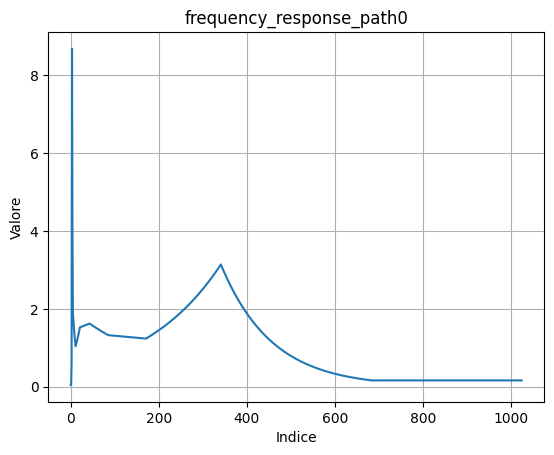

time to initializie freq resp =  0.2594916820526123


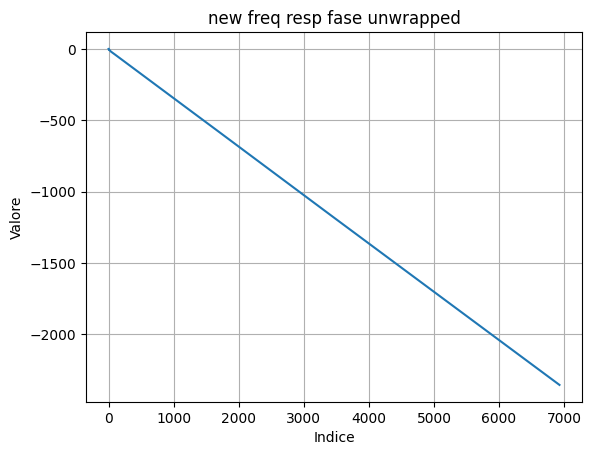

time to introduce delays =  2.64644718170166
time to compute az and ele and set up for the beampatterns:  0.021012067794799805


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.00 MiB. GPU 0 has a total capacity of 3.81 GiB of which 4.69 MiB is free. Including non-PyTorch memory, this process has 3.80 GiB memory in use. Of the allocated memory 3.39 GiB is allocated by PyTorch, and 342.66 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [8]:
resp = R_0.render_RIR_learned_beampattern(L_0)
resp

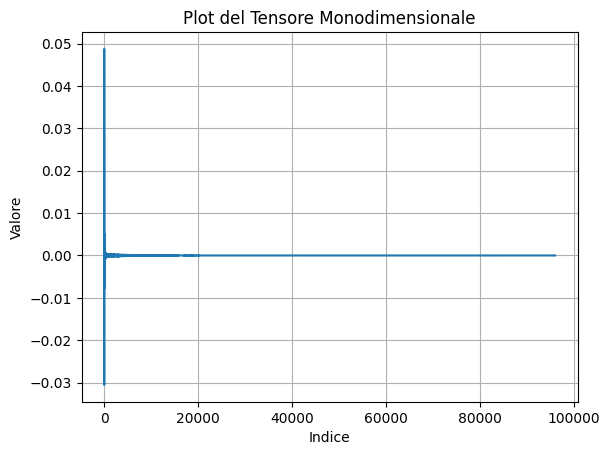

In [9]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp[1]['t_response'].detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()

In [10]:
resp0 = R_0.render_RIR(L_0)
resp0

tensor([-2.6540e-10,  3.6859e-06,  5.5096e-06,  ...,  6.9838e-06,
         6.3781e-06,  6.7109e-06], grad_fn=<AddBackward0>)

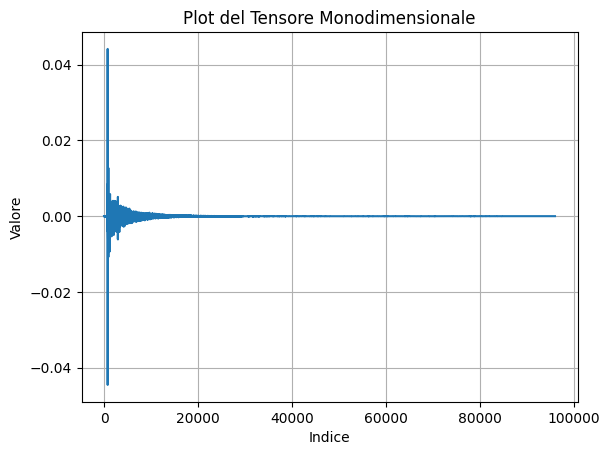

In [11]:
import torch
import matplotlib.pyplot as plt

# Step 3: Fare il plot del tensore
plt.plot(resp0.detach().cpu())
plt.title("Plot del Tensore Monodimensionale")
plt.xlabel("Indice")
plt.ylabel("Valore")
plt.grid(True)
plt.show()